In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

In [6]:
# Read the CSV file
df = pd.read_csv(r"C:\Users\vashi\Downloads\News_Aggregator_Kitwe Data Collection - News_Aggregator_Kitwe Data Collection.csv")

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14344 entries, 0 to 14343
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Source       14344 non-null  object
 1   Category     13870 non-null  object
 2   Headline     14343 non-null  object
 3   Link         14344 non-null  object
 4   Description  14330 non-null  object
 5   Date         14344 non-null  object
 6   Author       14343 non-null  object
dtypes: object(7)
memory usage: 784.6+ KB
None


In [10]:
print("\
First few rows:")
print(df.head())

First few rows:
              Source         Category  \
0  Daily Mail Zambia  Headlines, News   
1  Daily Mail Zambia  Headlines, News   
2  Daily Mail Zambia  Headlines, News   
3  Daily Mail Zambia  Headlines, News   
4  Daily Mail Zambia  Headlines, News   

                                            Headline  \
0                K8 million CBU hall building starts   
1  Exercise aimed at recruiting 300,000 members i...   
2                K8 million CBU hall building starts   
3  Exercise aimed at recruiting 300,000 members i...   
4                K8 million CBU hall building starts   

                                                Link  \
0  https://www.daily-mail.co.zm/2024/10/15/k8-mil...   
1  https://www.daily-mail.co.zm/2024/10/15/exerci...   
2  https://www.daily-mail.co.zm/2024/10/15/k8-mil...   
3  https://www.daily-mail.co.zm/2024/10/15/exerci...   
4  https://www.daily-mail.co.zm/2024/10/15/k8-mil...   

                                         Description  \
0  MWIL

In [13]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

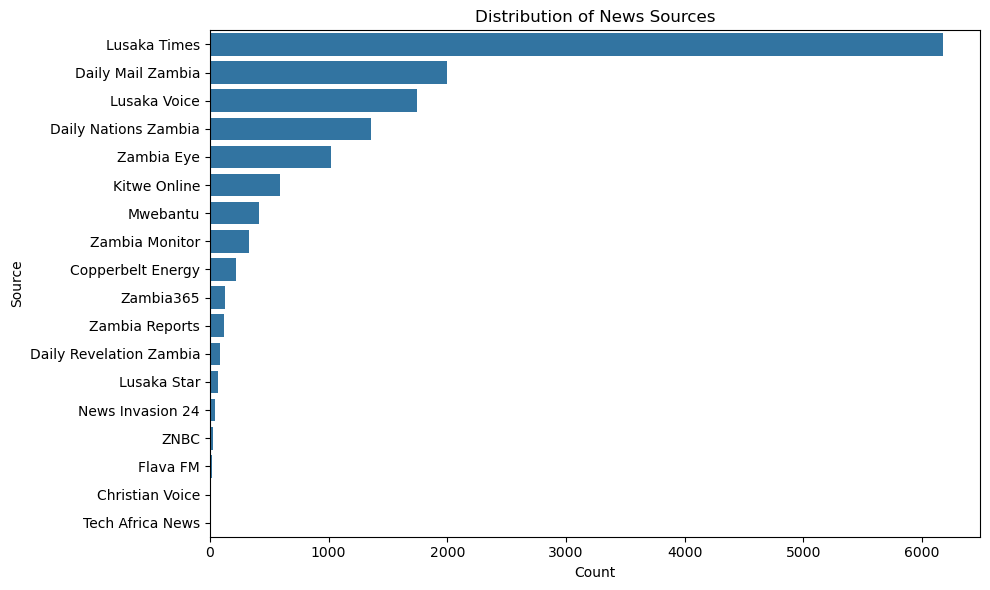

In [16]:
# 1. Source distribution
source_dist = df['Source'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=source_dist.values, y=source_dist.index)
plt.title('Distribution of News Sources')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

In [37]:
# 4. Author distribution
author_dist = df['Author'].value_counts().head(10)
print("\
Top 10 Authors:")
print(author_dist)


Top 10 Authors:
Author
sports              2630
editor              2226
Website Editor      2000
Online Editor       1258
Daily Nation        1141
Chief Editor        1094
News Desk            646
Assistant Editor     392
Mwebantu Editor      391
JS                   350
Name: count, dtype: int64


C:\Users\vashi\AppData\Local\Temp\ipykernel_13600\4004684184.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=author_dist.values, y=author_dist.index, palette="magma")


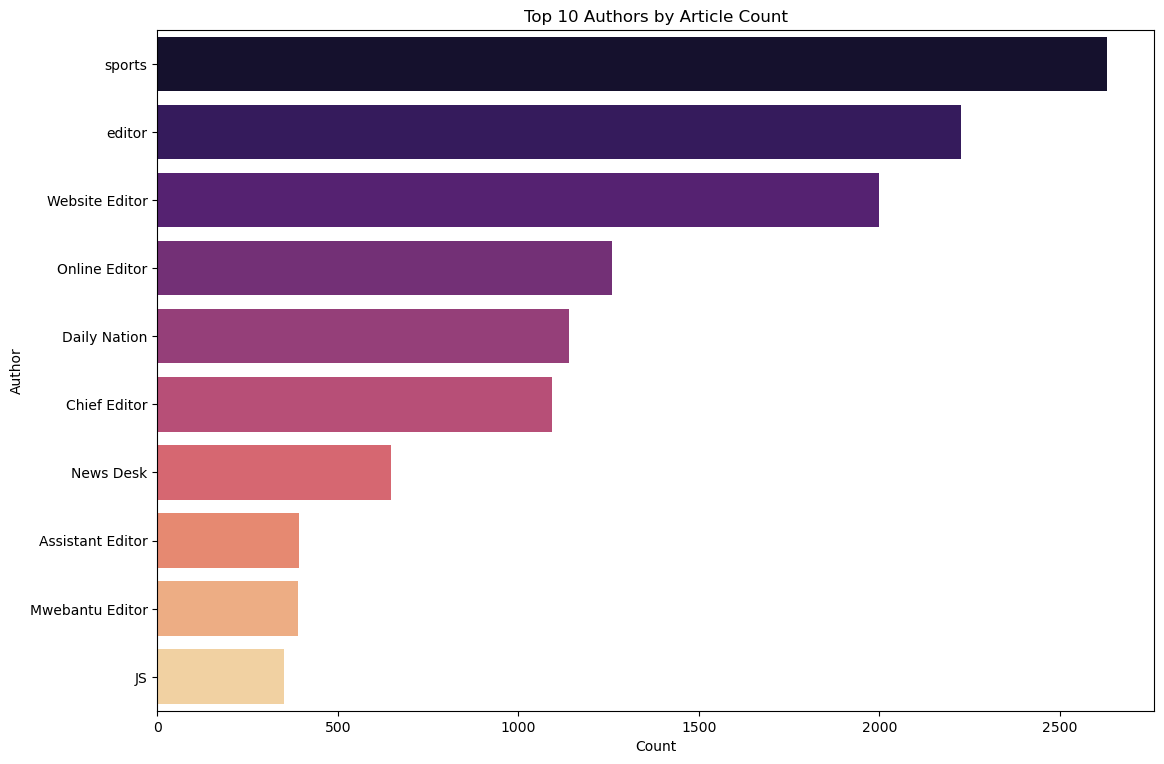

In [56]:
# Top 10 Authors distribution
author_dist = df['Author'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=author_dist.values, y=author_dist.index, palette="magma")

plt.title("Top 10 Authors by Article Count")
plt.xlabel("Count")
plt.ylabel("Author")
plt.tight_layout(pad=2)
plt.show()

In [43]:
# 5. Average headline length
df['headline_length'] = df['Headline'].str.len()
print("\
Headline Length Statistics:")
print(df['headline_length'].describe())

Headline Length Statistics:
count    14343.000000
mean        49.314230
std         20.252569
min          1.000000
25%         35.000000
50%         46.000000
75%         59.000000
max        197.000000
Name: headline_length, dtype: float64


In [46]:
#6. word count in description
df['description_word_count'] = df['Description'].str.split().str.len()
print("\
Description Word Count Statistics:")
print(df['description_word_count'].describe())


Description Word Count Statistics:
count    14330.000000
mean        58.939218
std         14.791410
min          1.000000
25%         56.000000
50%         56.000000
75%         56.000000
max        169.000000
Name: description_word_count, dtype: float64


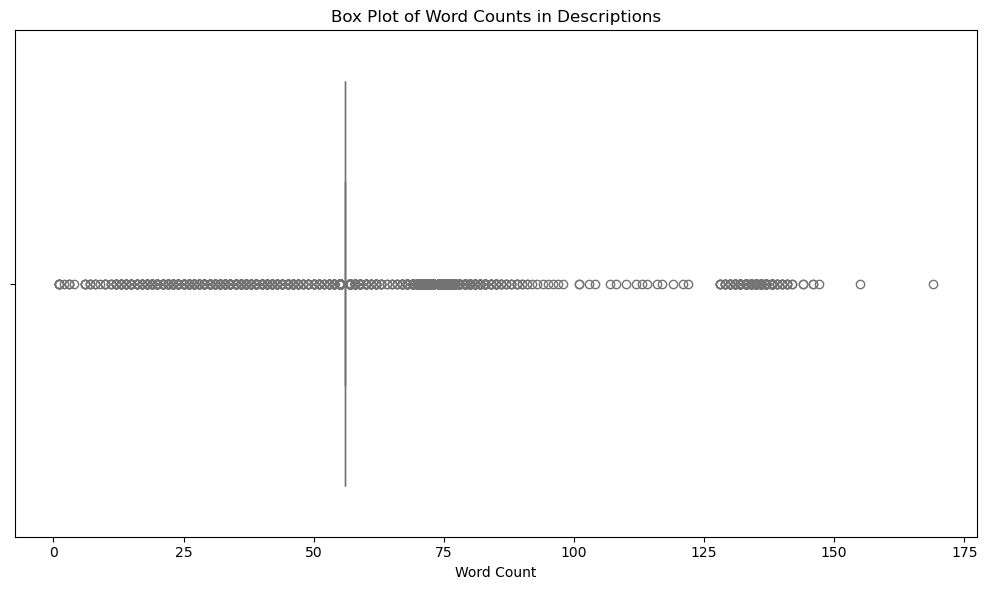

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['description_word_count'], color='lightgreen')

plt.title('Box Plot of Word Counts in Descriptions')
plt.xlabel('Word Count')
plt.tight_layout()
plt.show()


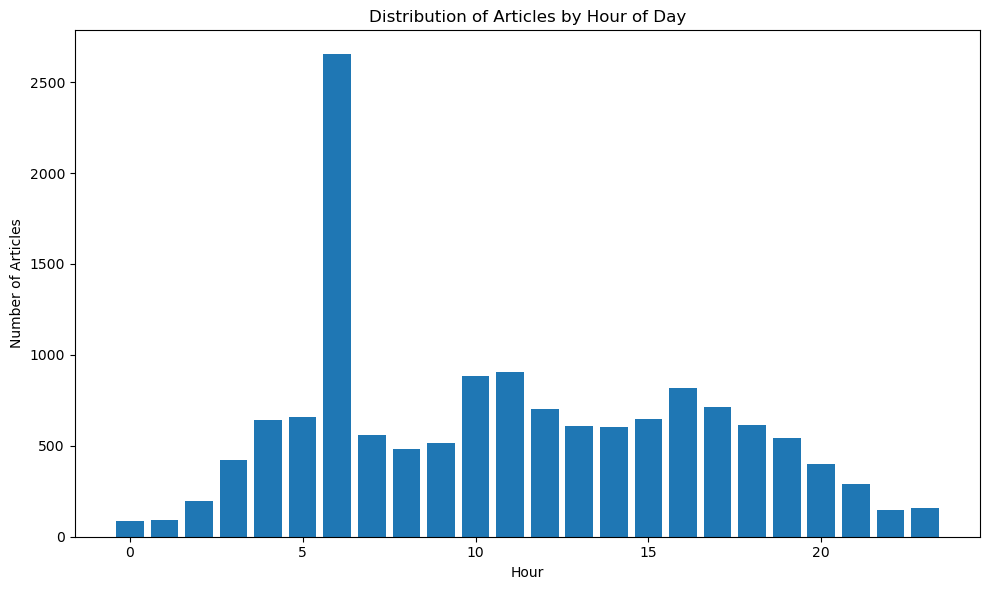

In [51]:
# 7. Time analysis
df['hour'] = df['Date'].dt.hour
hourly_dist = df['hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(hourly_dist.index, hourly_dist.values)
plt.title('Distribution of Articles by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()


C:\Users\vashi\AppData\Local\Temp\ipykernel_13600\3782706438.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_articles = df.groupby(df['Date'].dt.to_period('M')).size()


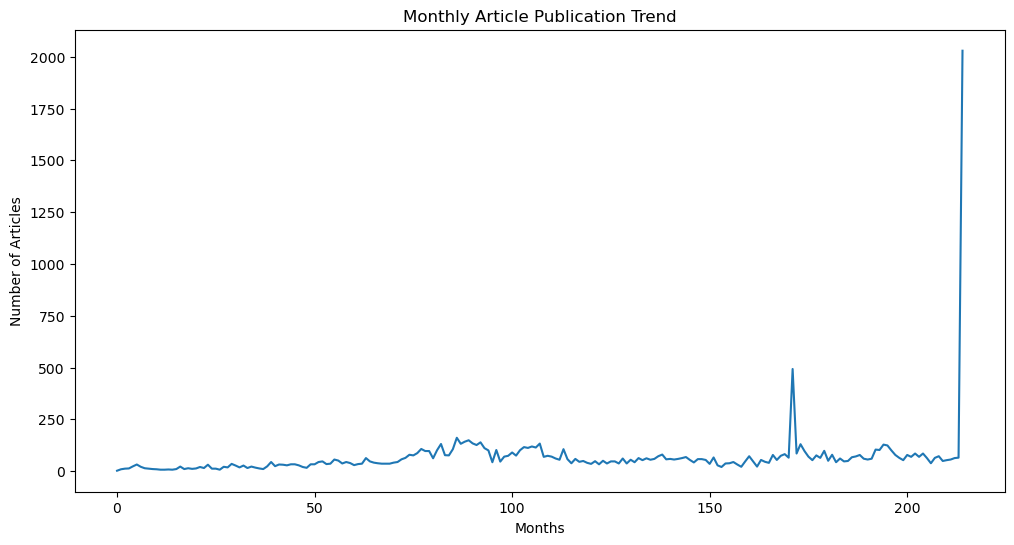

In [60]:
# 8. Monthly trend analysis
monthly_articles = df.groupby(df['Date'].dt.to_period('M')).size()
plt.figure(figsize=(12, 6))
plt.plot(range(len(monthly_articles)), monthly_articles.values)
plt.title('Monthly Article Publication Trend')
plt.xlabel('Months')
plt.ylabel('Number of Articles')
plt.show()

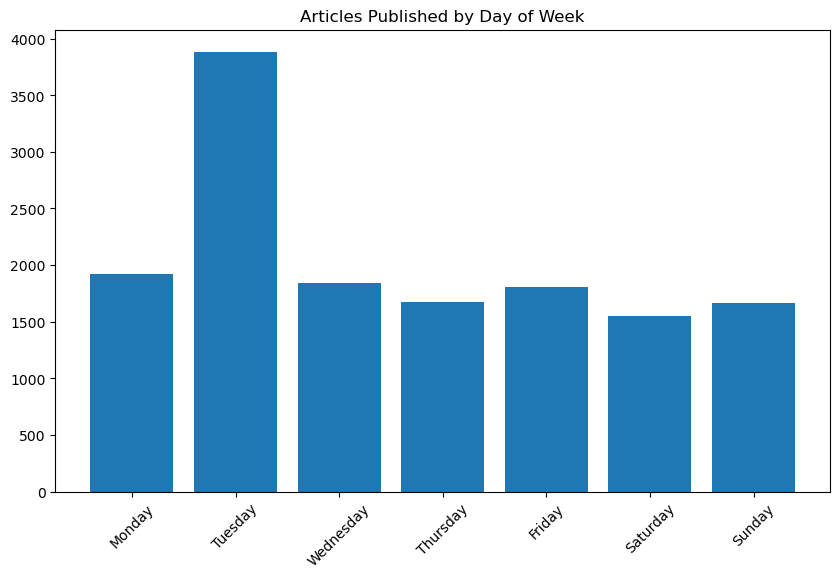

In [64]:
# 10. Weekday analysis
df['Weekday'] = df['Date'].dt.day_name()
weekday_dist = df['Weekday'].value_counts()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_dist = weekday_dist.reindex(weekday_order)
plt.figure(figsize=(10, 6))
plt.bar(weekday_dist.index, weekday_dist.values)
plt.title('Articles Published by Day of Week')
plt.xticks(rotation=45)
plt.show()

In [71]:
# Calculate average word count and unique word ratio
df['word_count'] = df['Headline'].str.split().str.len()
df['unique_words'] = df['Headline'].apply(lambda x: len(set(str(x).lower().split())))
df['unique_word_ratio'] = df['unique_words'] / df['word_count']

# Calculate complexity metrics
df['word_complexity'] = df['Headline'].apply(lambda x: sum(len(word) > 6 for word in str(x).split()) / len(str(x).split()))

print("\
Key Linguistic Metrics:")
print("\
Word Count Statistics:")
print(df['word_count'].describe())

print("\
Unique Word Ratio Statistics:")
print(df['unique_word_ratio'].describe())



Key Linguistic Metrics:
Word Count Statistics:
count    14343.000000
mean         7.765600
std          3.176401
min          1.000000
25%          6.000000
50%          7.000000
75%          9.000000
max         31.000000
Name: word_count, dtype: float64
Unique Word Ratio Statistics:
count    14343.000000
mean         0.993414
std          0.026299
min          0.650000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: unique_word_ratio, dtype: float64


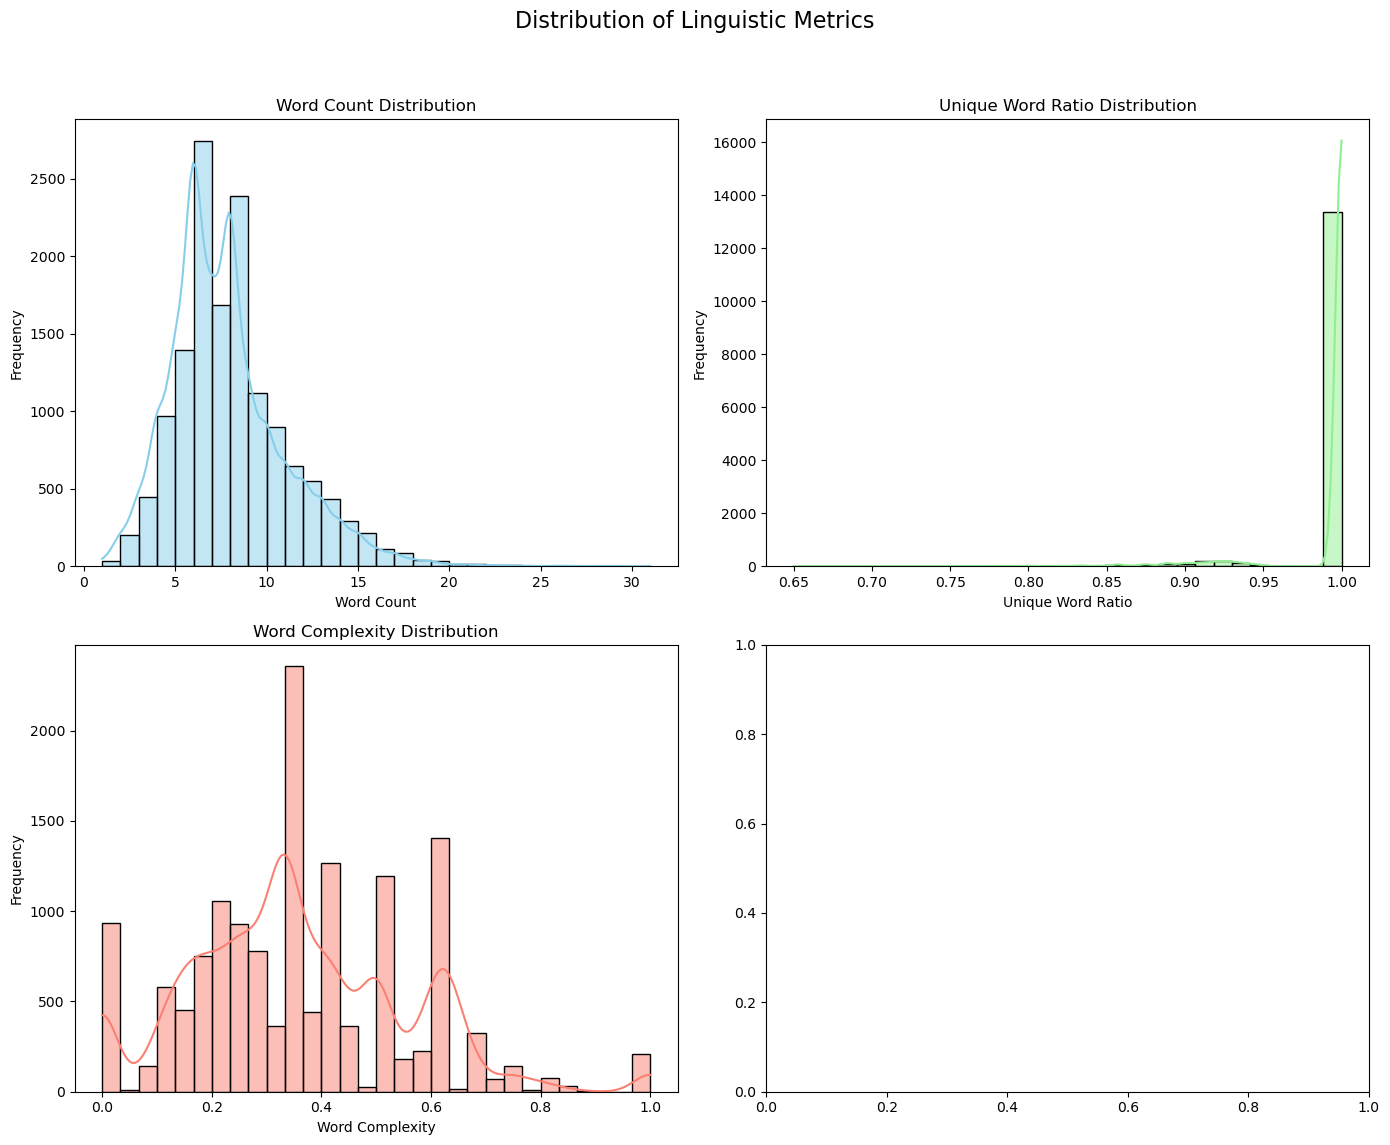

In [73]:
# Set up a larger figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle("Distribution of Linguistic Metrics", fontsize=16)

# Word Count Distribution
sns.histplot(df['word_count'], bins=30, kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title('Word Count Distribution')
axes[0, 0].set_xlabel('Word Count')
axes[0, 0].set_ylabel('Frequency')

# Unique Word Ratio Distribution
sns.histplot(df['unique_word_ratio'], bins=30, kde=True, ax=axes[0, 1], color="lightgreen")
axes[0, 1].set_title('Unique Word Ratio Distribution')
axes[0, 1].set_xlabel('Unique Word Ratio')
axes[0, 1].set_ylabel('Frequency')

# Word Complexity Distribution
sns.histplot(df['word_complexity'], bins=30, kde=True, ax=axes[1, 0], color="salmon")
axes[1, 0].set_title('Word Complexity Distribution')
axes[1, 0].set_xlabel('Word Complexity')
axes[1, 0].set_ylabel('Frequency')

# Adjust layout for clear visualization
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

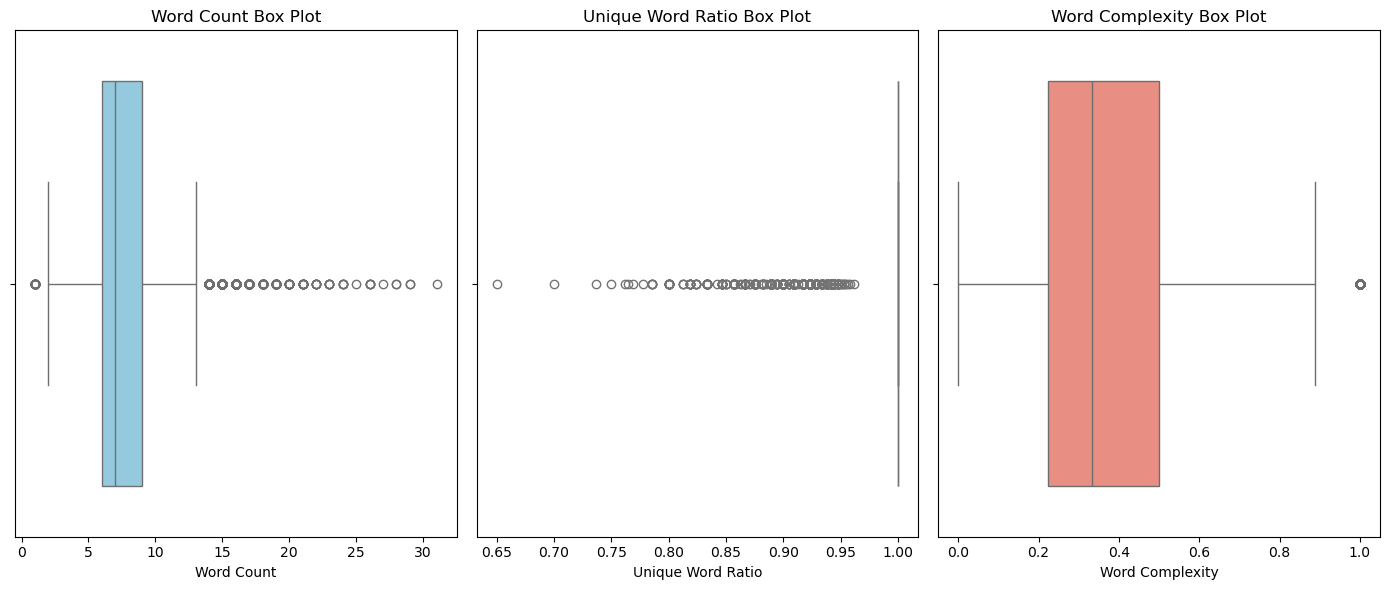

In [75]:
plt.figure(figsize=(14, 6))

# Word Count Box Plot
plt.subplot(1, 3, 1)
sns.boxplot(x=df['word_count'], color="skyblue")
plt.title("Word Count Box Plot")
plt.xlabel("Word Count")

# Unique Word Ratio Box Plot
plt.subplot(1, 3, 2)
sns.boxplot(x=df['unique_word_ratio'], color="lightgreen")
plt.title("Unique Word Ratio Box Plot")
plt.xlabel("Unique Word Ratio")

# Word Complexity Box Plot
plt.subplot(1, 3, 3)
sns.boxplot(x=df['word_complexity'], color="salmon")
plt.title("Word Complexity Box Plot")
plt.xlabel("Word Complexity")

plt.tight_layout()
plt.show()

In [85]:
# Check for duplicate headlines
duplicate_headlines = df[df.duplicated(['Headline'], keep=False)]
print("\
Number of Duplicate Headlines:", len(duplicate_headlines))
print("\
Sample of Duplicate Headlines:")
print(duplicate_headlines[['Headline', 'Source', 'Date']].head())

Number of Duplicate Headlines: 2440
Sample of Duplicate Headlines:
                                            Headline             Source  \
0                K8 million CBU hall building starts  Daily Mail Zambia   
1  Exercise aimed at recruiting 300,000 members i...  Daily Mail Zambia   
2                K8 million CBU hall building starts  Daily Mail Zambia   
3  Exercise aimed at recruiting 300,000 members i...  Daily Mail Zambia   
4                K8 million CBU hall building starts  Daily Mail Zambia   

                       Date  
0 2024-10-15 06:41:52+00:00  
1 2024-10-15 06:17:07+00:00  
2 2024-10-15 06:41:52+00:00  
3 2024-10-15 06:17:07+00:00  
4 2024-10-15 06:41:52+00:00  


C:\Users\vashi\AppData\Local\Temp\ipykernel_13600\2089778053.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=duplicate_by_source.index, y=duplicate_by_source.values, palette='Blues_d')


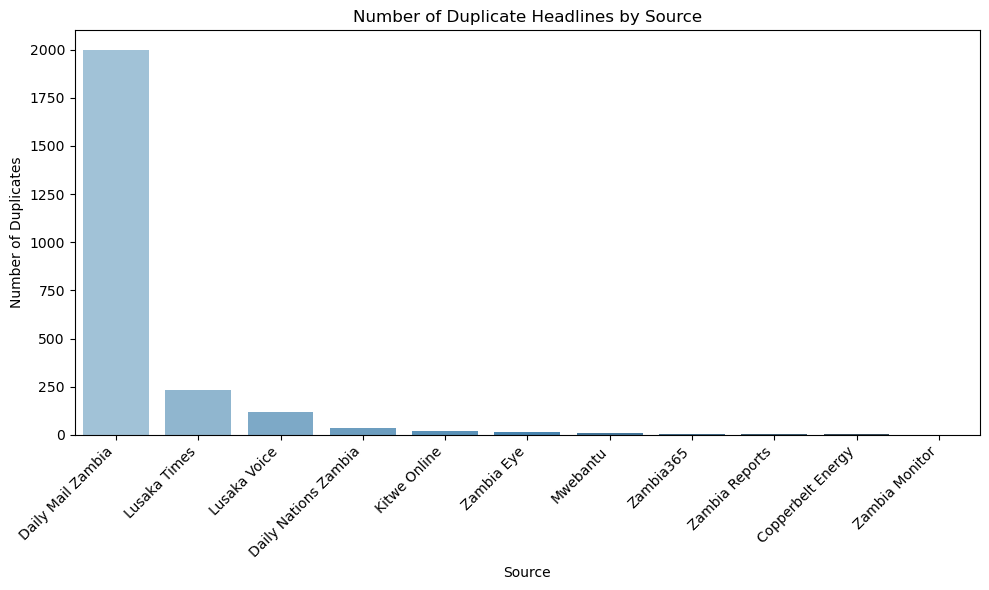

In [91]:
# Count duplicates by 'Source'
duplicate_by_source = duplicate_headlines['Source'].value_counts()

# Plot the count of duplicate headlines by source
plt.figure(figsize=(10, 6))
sns.barplot(x=duplicate_by_source.index, y=duplicate_by_source.values, palette='Blues_d')

# Add labels and title
plt.xlabel('Source')
plt.ylabel('Number of Duplicates')
plt.title('Number of Duplicate Headlines by Source')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()
